In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

## Introducation
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data Description

PassengerId which is just a running index and the indication whether this passenger survived (1) or not (0) we have the following information for each person:

Pclass is the Ticket-class: first (1), second (2), and third (3) class tickets were used. This is an ordinal integer feature.

Name is the name of the passenger. The names also contain titles and some persons might share the same surname; indicating family relations. We know that some titles can indicate a certain age group. For instance Master is a boy while Mr is a man. This feature is a character string of variable length but similar format.

Sex is an indicator whether the passenger was female or male. This is a categorical text string feature.

Age is the integer age of the passenger. There are NaN values in this column.

SibSp is another ordinal integer feature describing the number of siblings or spouses travelling with each passenger.

Parch is another ordinal integer features that gives the number of parents or children travelling with each passenger.

Ticket is a character string of variable length that gives the ticket number.

Fare is a float feature showing how much each passenger paid for their rather memorable journey.

Cabin gives the cabin number of each passenger. There are NaN in this column. This is another string feature.

Embarked shows the port of embarkation as a categorical character value.

In [8]:
train_df=pd.read_csv("B:\\train_v2\\titanic_train.csv")

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df=pd.read_csv("B:\\train_v2\\titanic_test.csv")

In [11]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 ### Number of records and Features in the datasets
 ** Let Examine the  Train  and Test DataSet**

In [12]:
print('---'*40)
print("The number of Features in  train dataset :",train_df.shape[1])
print("The number of Rows in Train dataset :",train_df.shape[0])
print('---'*40)
print('-----Test Dataset------------------------------')
print("The number of Features in  test dataset :",test_df.shape[1])
print("The number of Rows in  Test dataset :",test_df.shape[0])

------------------------------------------------------------------------------------------------------------------------
The number of Features in  train dataset : 12
The number of Rows in Train dataset : 891
------------------------------------------------------------------------------------------------------------------------
-----Test Dataset------------------------------
The number of Features in  test dataset : 11
The number of Rows in  Test dataset : 418


## Identifying Numerical and Categorical Features
###  Function for  find out Numerical and categeical Variables

In [13]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)

In [14]:
print('Train_dataset')
print('````'*40)
type_features(train_df)

Train_dataset
````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````
categorical_features : Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [15]:
print('Test_dataset')
print('````'*40)
type_features(test_df)

Test_dataset
````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````
categorical_features : Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


## identifying the missing values

In [16]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


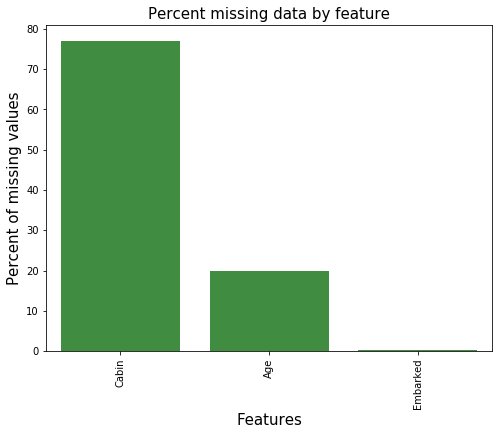

In [17]:
missingdata(train_df)

------------------------------Test_Dataset--------------------------------------------


,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


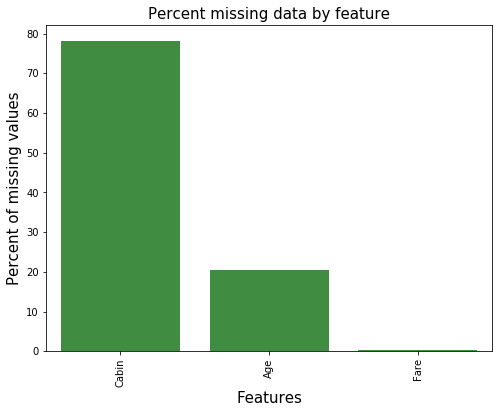

In [18]:
print('------------------------------Test_Dataset--------------------------------------------')
missingdata(test_df)

## Checking the Imbalance of Target Variable

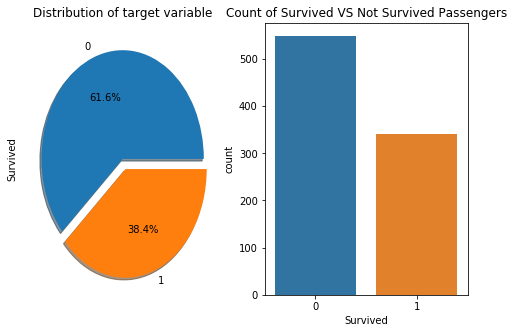

In [19]:
f,ax=plt.subplots(1,2,figsize=(8,5))
train_df.Survived.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Count of Survived VS Not Survived Passengers')
plt.show() 

**It is evident that  many Passenger are unable to survived for the accident  i.e Only 38.4% of the total passenger are able to survived.
We need to drill down more to get better insights from the data and see which categories of the passenger are  able to survied or not for the accident.**

We will try to check the survied  and dead rate by using the different features of the dataset. 
Some of the features being sex,age,Pclass,etc. First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, 
 Sex  is a categorical variable having Two categories. Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex

### Analysing The Features
***SEX is a Categorical Feature***

In [20]:
def group_by(df,t1='',t2=''):
    a1=df.groupby([t1,t2])[t2].count()
    return a1

In [21]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(15,5))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0])
    ax[0].set_title('count of passenger Based on  '+ t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1])
    ax[1].set_title(t1 + ': Survived vs dead')
    a=plt.show()
    return a

In [22]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

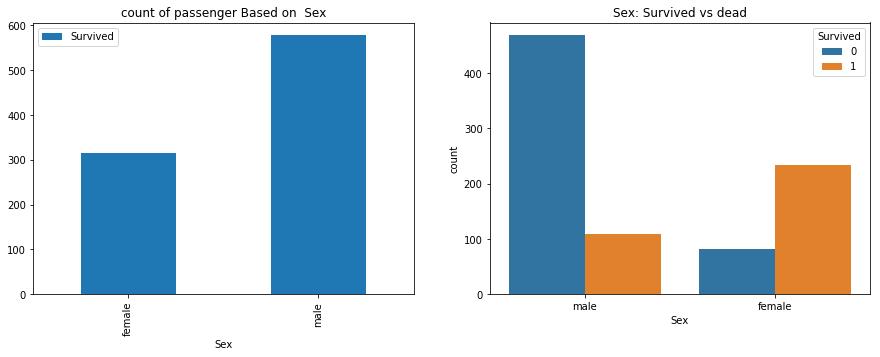

In [23]:
plot_re(train_df,'Sex','Survived')

In [24]:
group_by(train_df,'Sex','Survived')

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

*** by looking above the given plot and group by fuction its clear proof that the female has more count of survived rate compare to male***

### Now create bin for age so that we can know which age of passenger count has maximum survived rate

In [25]:
train_df['Age_bin'] = pd.cut(train_df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
train_df['Age_bin'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age_bin, dtype: category
Categories (4, object): [Children < Teenage < Adult < Elder]

In [26]:
group_by(train_df,'Age_bin','Survived')

Age_bin   Survived
Children  0            29
          1            40
Teenage   0            68
          1            42
Adult     0           232
          1           153
Elder     0            95
          1            55
Name: Survived, dtype: int64

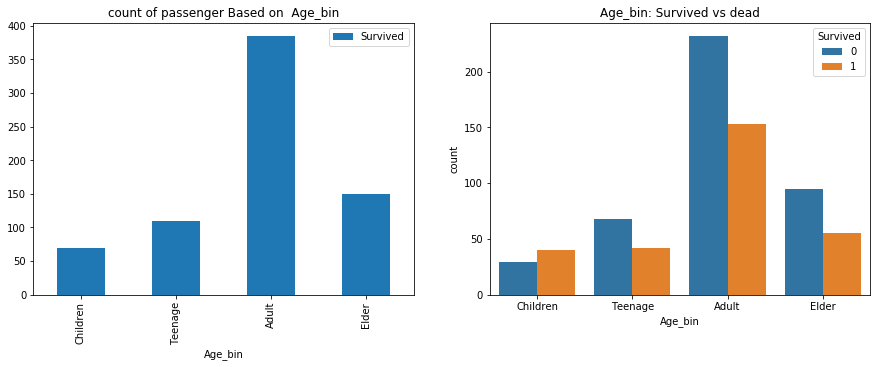

In [27]:
plot_re(train_df,'Age_bin','Survived')

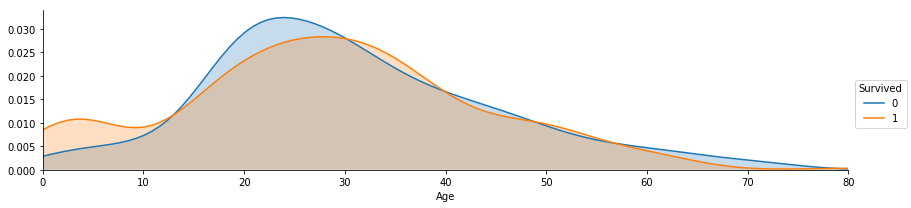

In [28]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

###  based on above given plot its clear the passenger  in between 0 to 18 has high count of survival and age between 20 to 40 also has high count of survival rate compare to other. 

## Analysis Name column
Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

Observations.

When we plot Title, Age, and Survived, we note the following observations.

Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).
Decision.

We decide to retain the new Title feature for model training.


In [29]:

train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Ms            1
Mme           1
Lady          1
Don           1
Jonkheer      1
Capt          1
Countess      1
Name: Title, dtype: int64

### We can replace many titles with a more common name or classify them as Rare

In [31]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [32]:
train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

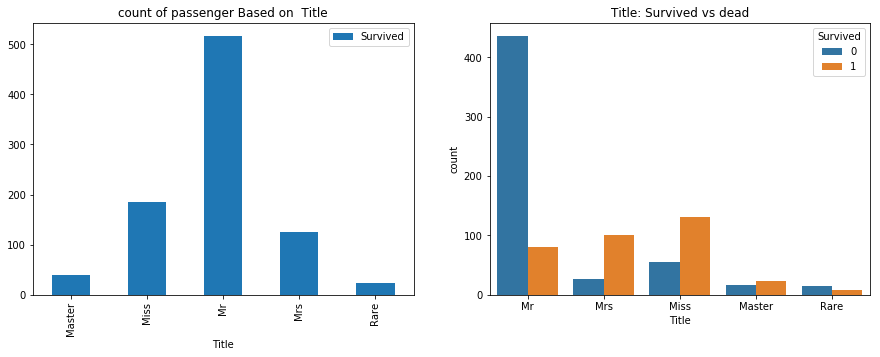

In [33]:
plot_re(train_df,'Title','Survived')

#### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset:Pclass and Embarked

In [34]:
def or_plot(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[t1].value_counts().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('Number Of Passenger By '+t1)
    ax[0].set_xlabel("Score of :"+t1)
    ax[0].set_ylabel('Count')
    sns.countplot(t1,hue=t2,data=train_df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+':Survived vs Dead')
    a=plt.show()
    return a

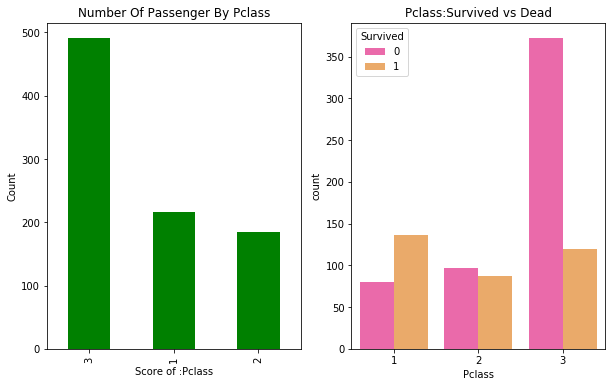

In [35]:
or_plot(train_df,'Pclass','Survived')

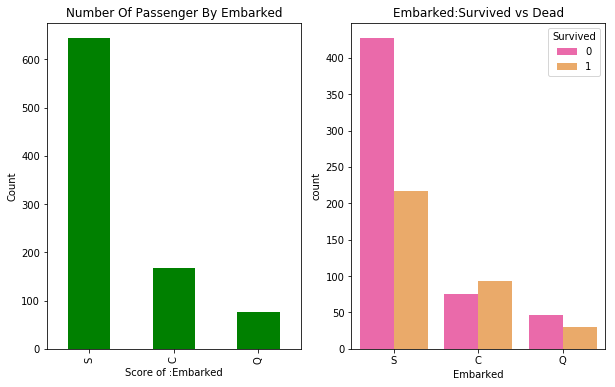

In [36]:
or_plot(train_df,'Embarked','Survived')

### based on above given plot it clear the the Pclass 1 has the high rate of survival and in Embarked c has high rate of survival compare with other.

## now we analysis with base Parch(Parents travel with passenger) SibSp(siblings travel with the passenger)

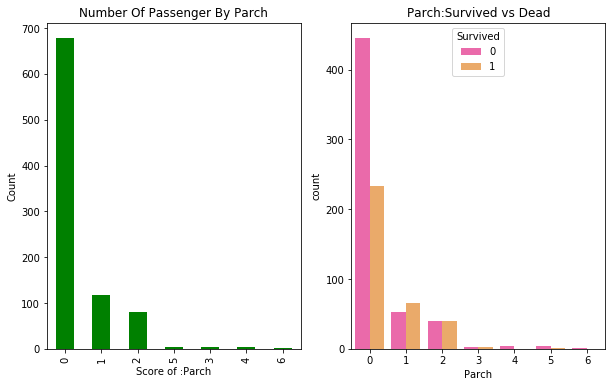

In [37]:
or_plot(train_df,'Parch','Survived')

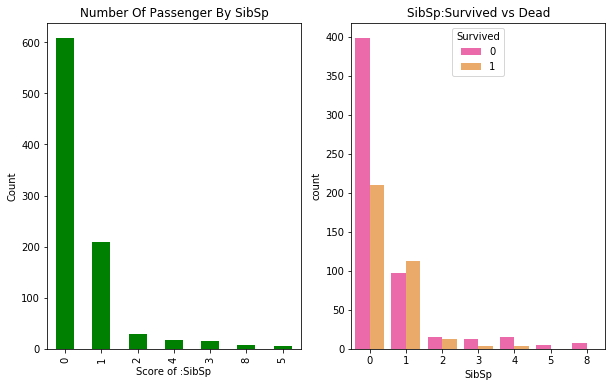

In [38]:
or_plot(train_df,'SibSp','Survived')

#### by look at the above given plot it clear that passenger travel with 1 siblings has high count of survival rate.

In [39]:
# Create new feature FamilySize as a combination of SibSp and Parch
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [40]:
train_df['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

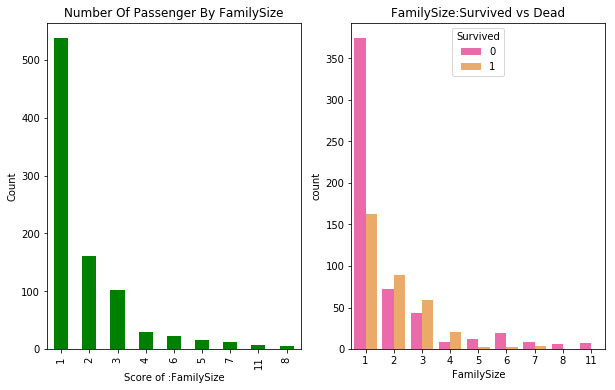

In [41]:
or_plot(train_df,'FamilySize','Survived')

In [42]:
# Create new feature IsAlone from FamilySize
train_df['Alone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'Alone'] = 1

In [43]:
train_df.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

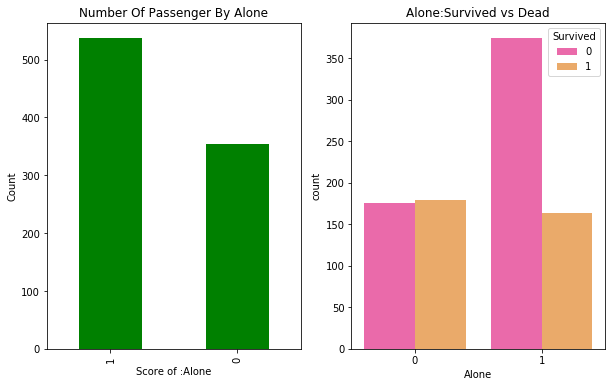

In [44]:
or_plot(train_df,'Alone','Survived')

Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

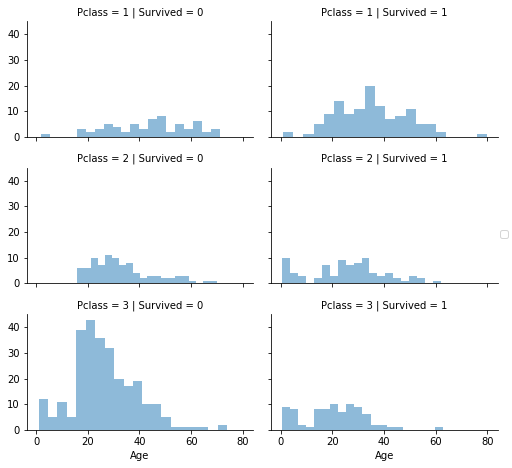

In [45]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### if look at the above given plot its is clear that the pclass 1 has high rate of survived and Pclass 3 has higest rate of dead.

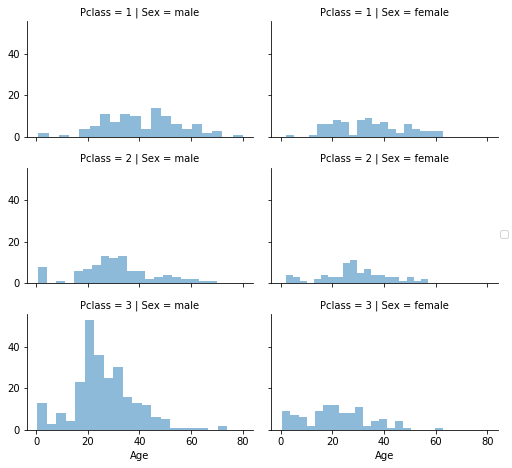

In [46]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()


### Correlation Between The Features

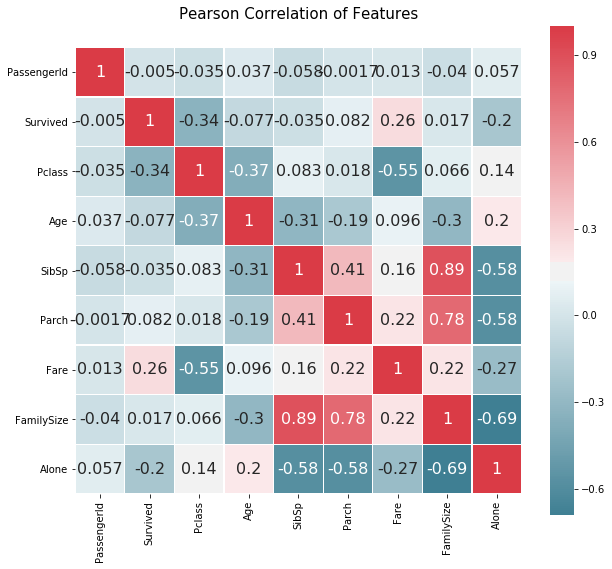

In [47]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':16}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_df)

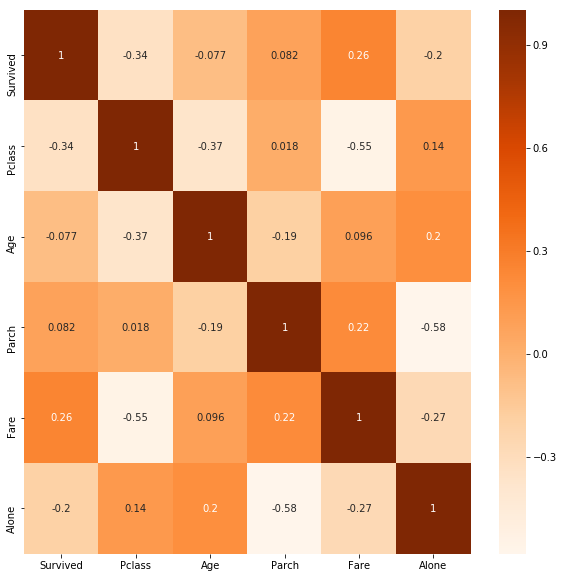

In [48]:
# most correlated features
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["Survived"])>=0.05]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Oranges")

### Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

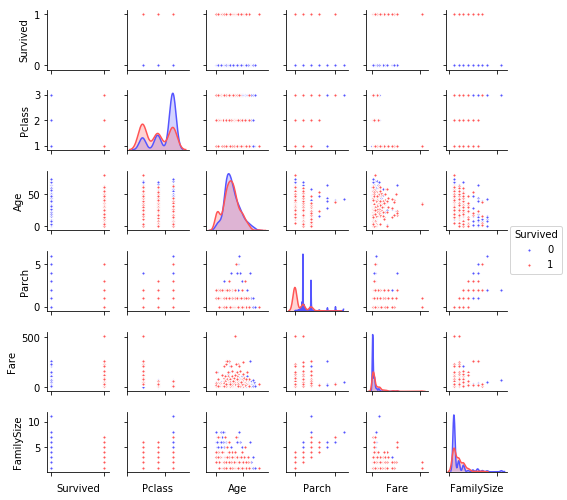

In [49]:
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

those are few EAD i have done please vote for me which help my movitvation to increase to do a lot of work if there any imporvment can be done means please say in comments
References
This notebook has been created based on great work done solving the Titanic competition and other sources.

A journey through Titanic
Getting Started with Pandas: Kaggle's Titanic Competition
Titanic Best Working Classifier